# Linear Shell solution

## Init symbols for *sympy*

In [1]:
from sympy import *
from geom_util import *
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

%matplotlib inline

%reload_ext autoreload
%autoreload 2
%aimport geom_util

In [2]:
# Any tweaks that normally go in .matplotlibrc, etc., should explicitly go here
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (12, 12)

plt.rc('text', usetex=True)
    
plt.rc('font', family='serif')

init_printing()

In [3]:
N = CoordSys3D('N')
alpha1, alpha2, alpha3 = symbols("alpha_1 alpha_2 alpha_3", real = True, positive=True)
A,K,rho = symbols("A K rho")

### Tymoshenko theory

$u_1 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u\left( \alpha_1 \right)+\alpha_3\gamma \left( \alpha_1 \right) $

$u_2 \left( \alpha_1, \alpha_2, \alpha_3 \right)=0 $

$u_3 \left( \alpha_1, \alpha_2, \alpha_3 \right)=w\left( \alpha_1 \right) $

$ \left( 
\begin{array}{c} 
u_1 \\
\frac { \partial u_1 } { \partial \alpha_1} \\
\frac { \partial u_1 } { \partial \alpha_2} \\
\frac { \partial u_1 } { \partial \alpha_3} \\
u_2 \\
\frac { \partial u_2 } { \partial \alpha_1} \\
\frac { \partial u_2 } { \partial \alpha_2} \\
\frac { \partial u_2 } { \partial \alpha_3} \\
u_3 \\
\frac { \partial u_3 } { \partial \alpha_1} \\
\frac { \partial u_3 } { \partial \alpha_2} \\
\frac { \partial u_3 } { \partial \alpha_3} \\
\end{array} 
\right) = T \cdot 
\left( 
\begin{array}{c} 
u \\
\frac { \partial u } { \partial \alpha_1} \\
\gamma \\
\frac { \partial \gamma } { \partial \alpha_1} \\
w \\
\frac { \partial w } { \partial \alpha_1} \\
\end{array} 
\right) $

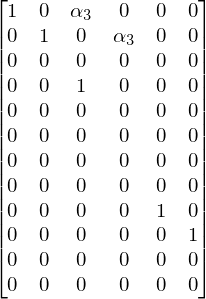

In [4]:
T=zeros(12,6)
T[0,0]=1
T[0,2]=alpha3
T[1,1]=1
T[1,3]=alpha3
T[3,2]=1

T[8,4]=1
T[9,5]=1
T

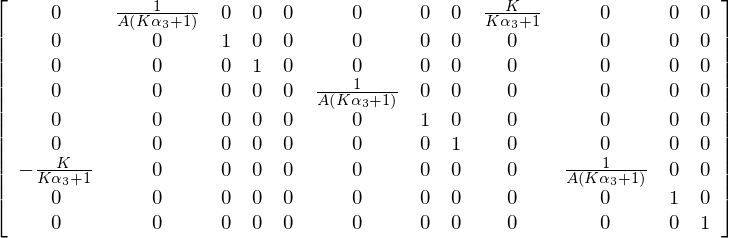

In [5]:
B=Matrix([[0, 1/(A*(K*alpha3 + 1)), 0, 0, 0, 0, 0, 0, K/(K*alpha3 + 1), 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1/(A*(K*alpha3 + 1)), 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [-K/(K*alpha3 + 1), 0, 0, 0, 0, 0, 0, 0, 0, 1/(A*(K*alpha3 + 1)), 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
B

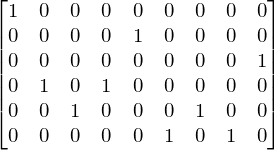

In [6]:
E=zeros(6,9)
E[0,0]=1
E[1,4]=1
E[2,8]=1
E[3,1]=1
E[3,3]=1
E[4,2]=1
E[4,6]=1
E[5,5]=1
E[5,7]=1
E

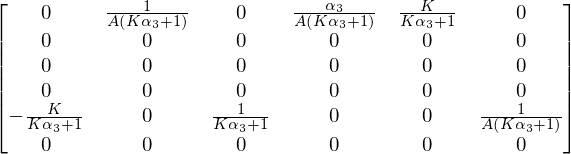

In [11]:
ES = simplify(E*B*T)

ES

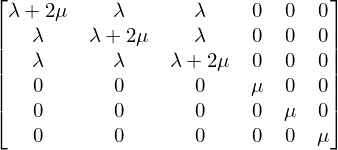

In [12]:
mu = Symbol('mu')
la = Symbol('lambda')
C_tensor = getIsotropicStiffnessTensor(mu, la)
C = convertStiffnessTensorToMatrix(C_tensor)
C

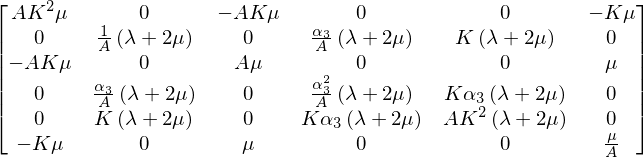

In [28]:
S=T.T*B.T*E.T*C*E*B*T*A*(1+alpha3*K)**2
S=simplify(S)
S

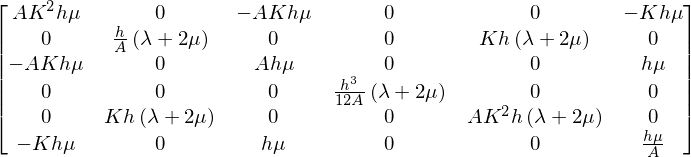

In [35]:
h=Symbol('h')
S_in = integrate(S,(alpha3, -h/2, h/2))
S_in

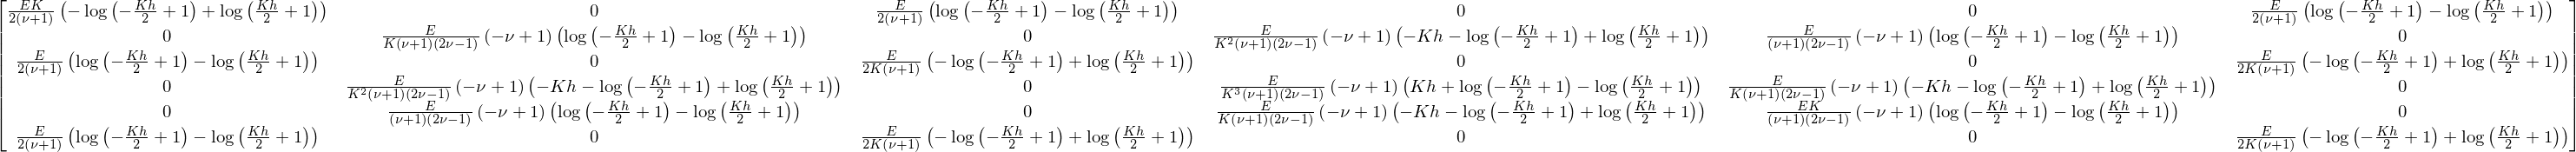

In [38]:
E,nu=symbols('E nu')
lambda_elastic=E*nu/((1+nu)*(1-2*nu))
mu_elastic=E/(2*(1+nu))
S_ins=simplify(S_in.subs(A,1).subs(la,lambda_elastic).subs(mu,mu_elastic))
S_ins

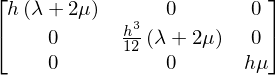

In [36]:

a11=C[0,0]
a44=C[4,4]

AM=Matrix([[a11,0],[0,a44]])
strainT=Matrix([[1,alpha3,0],[0,0,1]])
AT=strainT.T*AM*strainT
AT_in = integrate(AT,(alpha3, -h/2, h/2))
AT_in = simplify(AT_in)
AT_in


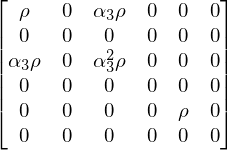

In [20]:
M=Matrix([[rho, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, rho, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, rho, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
M=T.T*M*T
M

In [34]:
M_in = integrate(M*A*(1+alpha3*K),(alpha3, -h/2, h/2))
M_in

rows, cols = M_in.shape

for i in range(rows):
    for j in range(cols):
        print('M[{},{}]={}'.format(i,j,M_in[i,j]))

M[0,0]=A*h*rho
M[0,1]=0
M[0,2]=A*K*h**3*rho/12
M[0,3]=0
M[0,4]=0
M[0,5]=0
M[1,0]=0
M[1,1]=0
M[1,2]=0
M[1,3]=0
M[1,4]=0
M[1,5]=0
M[2,0]=A*K*h**3*rho/12
M[2,1]=0
M[2,2]=A*h**3*rho/12
M[2,3]=0
M[2,4]=0
M[2,5]=0
M[3,0]=0
M[3,1]=0
M[3,2]=0
M[3,3]=0
M[3,4]=0
M[3,5]=0
M[4,0]=0
M[4,1]=0
M[4,2]=0
M[4,3]=0
M[4,4]=A*h*rho
M[4,5]=0
M[5,0]=0
M[5,1]=0
M[5,2]=0
M[5,3]=0
M[5,4]=0
M[5,5]=0


## Cartesian coordinates

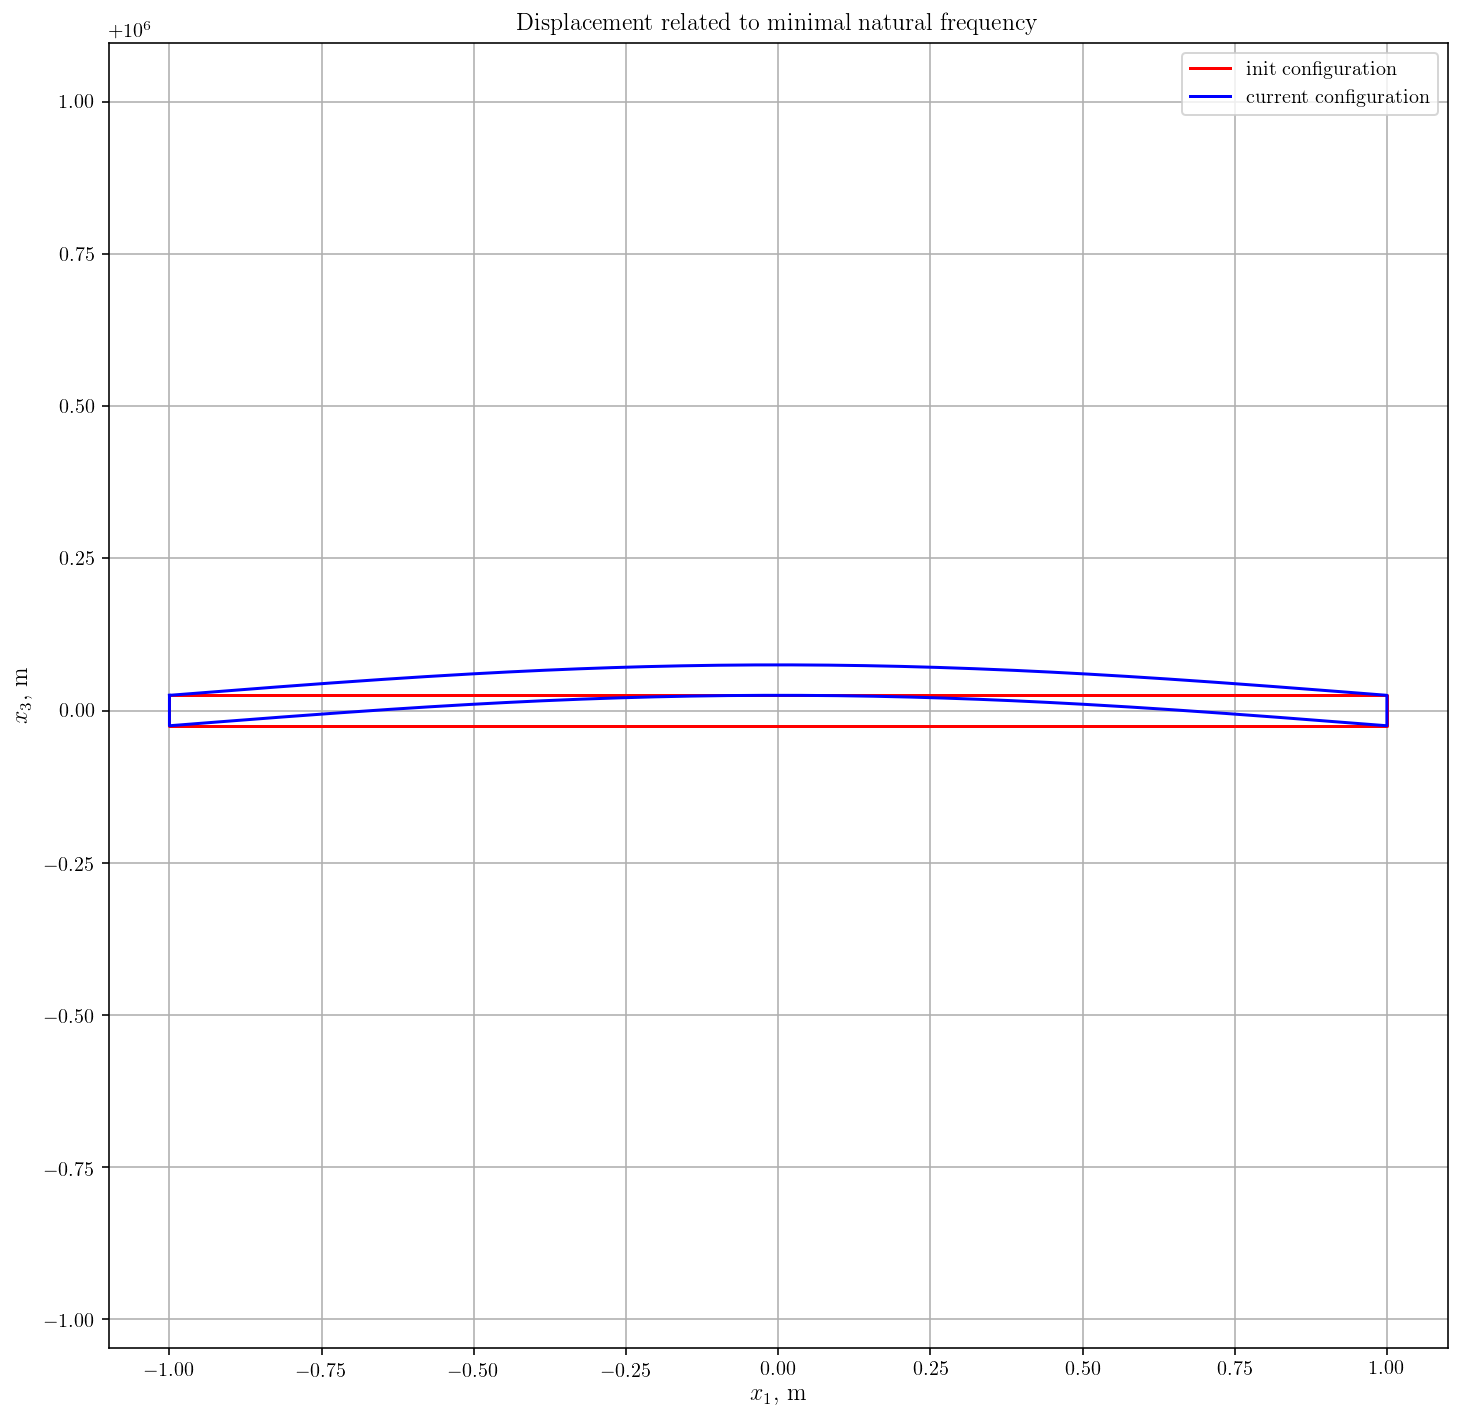

794.315014089
1486.1747087
1588.94419576
2383.93922827
2972.71611132
3179.51593075
3975.87453419
4459.99102569
4773.21284522
5571.72814375
5948.36644015
6371.61768119
7173.07888393
7438.20958459
7976.30945549
8781.50742929
8929.88803322
9588.87119582
10398.5995092
10423.7698069


In [48]:
import fem.geometry as g
import fem.model as m
import fem.material as mat
import fem.shell.shellsolver as s
import fem.shell.mesh1D as me
import plot

stiffness_matrix_func = lambdify([A, K, mu, la, h], S_in, "numpy")
mass_matrix_func = lambdify([A, K, rho, h], M_in, "numpy")


def stiffness_matrix(material, geometry, x1, x2, x3):
    A,K = geometry.get_A_and_K(x1,x2,x3)
    return stiffness_matrix_func(A, K, material.mu(), material.lam(), thickness)

def mass_matrix(material, geometry, x1, x2, x3):
    A,K = geometry.get_A_and_K(x1,x2,x3)
    return mass_matrix_func(A, K, material.rho, thickness)



def generate_layers(thickness, layers_count, material):
    layer_top = thickness / 2
    layer_thickness = thickness / layers_count
    layers = set()
    for i in range(layers_count):
        layer = m.Layer(layer_top - layer_thickness, layer_top, material, i)
        layers.add(layer)
        layer_top -= layer_thickness
    return layers


def solve(geometry, thickness, linear, N_width):
    layers_count = 1
    layers = generate_layers(thickness, layers_count, mat.IsotropicMaterial.steel())
    model = m.Model(geometry, layers, m.Model.FIXED_BOTTOM_LEFT_RIGHT_POINTS)
    mesh = me.Mesh1D.generate(width, layers, N_width, m.Model.FIXED_BOTTOM_LEFT_RIGHT_POINTS)
    lam, vec = s.solve(model, mesh, stiffness_matrix, mass_matrix)
    
    return lam, vec, mesh, geometry



width = 2
curvature = 0.000001
thickness = 0.05

corrugation_amplitude = 0
corrugation_frequency = 0

geometry = g.General(width, curvature, corrugation_amplitude, corrugation_frequency)

N_width = 100

lam, vec, mesh, geometry = solve(geometry, thickness, False, N_width)
results = s.convert_to_results(lam, vec, mesh, geometry)

results_index = 0
    
plot.plot_init_and_deformed_geometry_in_cartesian(results[results_index], 0, width, -thickness / 2, thickness / 2, 0, geometry.to_cartesian_coordinates)
to_print = 20
if (len(results) < to_print):
    to_print = len(results)
    
for i in range(to_print):
    print(results[i].rad_per_sec_to_Hz(results[i].freq))


In [43]:
values_N_width = [50, 100, 150, 200, 300, 400]

width = 2
curvature = 0.000001
thickness = 0.05

corrugation_amplitude = 0
corrugation_frequency = 0

geometry = g.General(width, curvature, corrugation_amplitude, corrugation_frequency)

results_all_n = {}

for n in values_N_width:
    lam, vec, mesh, geometry = solve(geometry, thickness, False, n)

    results = s.convert_to_results(lam, vec, mesh, geometry)
    
    results_all_n[n]=results

In [44]:
from jupyter_utils import ListTable

table = ListTable()
header = ['$\omega_i \\ N$']

for n in values_N_width:
    header.append(n)

table.append(header)

to_print = 5
for i in range(to_print):
    row = [i]
    for n in values_N_width:
        results = results_all_n[n]
        wi = results[i].rad_per_sec_to_Hz(results[i].freq)
        row.append(wi)
    
    table.append(row)


table

$\omega_i \ N$,50,100,150,200,300,400
0,794.4130723765848,794.3150140893132,794.2973058291047,794.291108609547,794.2874881711591,794.284255036281
1,1486.3580520636463,1486.1747087012725,1486.1407670130354,1486.129031376257,1486.1215737489028,1486.1180375603456
2,1589.7284704545323,1588.9441957582492,1588.7995835005158,1588.7489562108592,1588.7141918992795,1588.6991869680949
3,2386.5867859753735,2383.939228268356,2383.449593989767,2383.278161029085,2383.1573560199745,2383.1122956339473
4,2974.1832208053447,2972.7161113246448,2972.4445002777356,2972.349619132819,2972.2828182634144,2972.258691686731
